## Theoretical simulation of a circuit
In this notebook we provide some basics to perform an ideal simulation of a circuit.

In particular we use qiskit library:
- to evolve a circuit given an initial state vector
- to derive the unitary matrix of the circuit
- to perform a measure of the outputs

Furthermore:
- we provide a function to plot real and imaginary parts of a statevector
- we use qisikit plot_state_city function to plot the density matrix of a quantum state
- we use qiskit plot_state_qsphere function to plot the qsphere representation of a quantum state
- we plot the Bloch sphere representation of a state vector using qiskit plot_bloch_multivector function



In [1]:
#Imports
import matplotlib.pyplot as plt  # for plots
import numpy as np
from qiskit import QuantumCircuit  # to define the quantum circuit
from qiskit.quantum_info import Statevector  # to compute state vectors
from qiskit_aer import Aer  # to define the backend
from qiskit.visualization import array_to_latex  # to visualize the circuit matrix and state vectors in latex format
from qiskit.visualization import plot_state_city # to plot the density matrix of a state vector
from qiskit.visualization import plot_state_qsphere # to plot the state vector in a qsphere
from qiskit.visualization import plot_bloch_multivector # to represent the state vector in Bloch spheres
from qiskit.visualization import plot_histogram  # to plot histograms of simulation results

#import helper utilities
import os
import sys
sys.path.insert(0, os.path.abspath('../../utils'))
import Helpers as hp

### Circuit definition

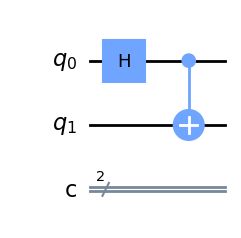

In [2]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)
circ.draw('mpl', style='clifford')

### Statevector evolution

In [3]:
stateVecIn = Statevector([0, 0, 0, 1])
stateVecOut = stateVecIn.evolve(circ)
# Display the evolved state vector
array_to_latex(stateVecOut, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

### Unitary matrix extraction

In [4]:
#Unitary matrix of the quantum circuit
hp.derive_unitary_matrix(circ)

<IPython.core.display.Latex object>

### Plots

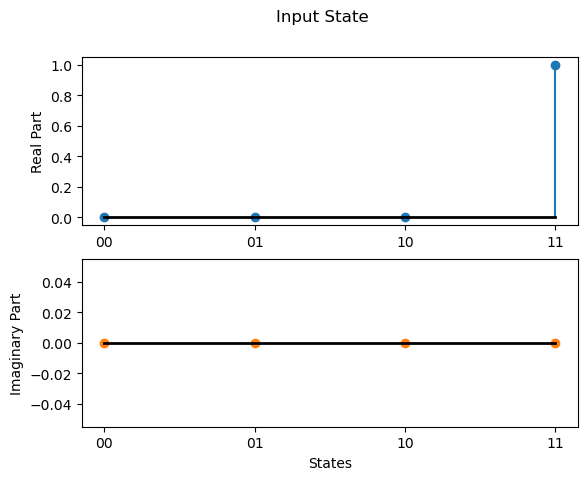

In [5]:
hp.plot_statevector(stateVecIn, 'Input State')

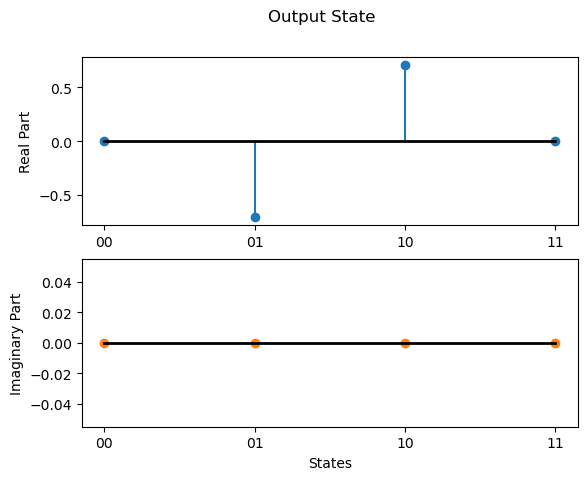

In [6]:
hp.plot_statevector(stateVecOut, 'Output State')

### Density matrix 
Plot the cityscape of quantum state.
Plot two 3d bar graphs (two dimensional) of the real and imaginary part of the density matrix rho.

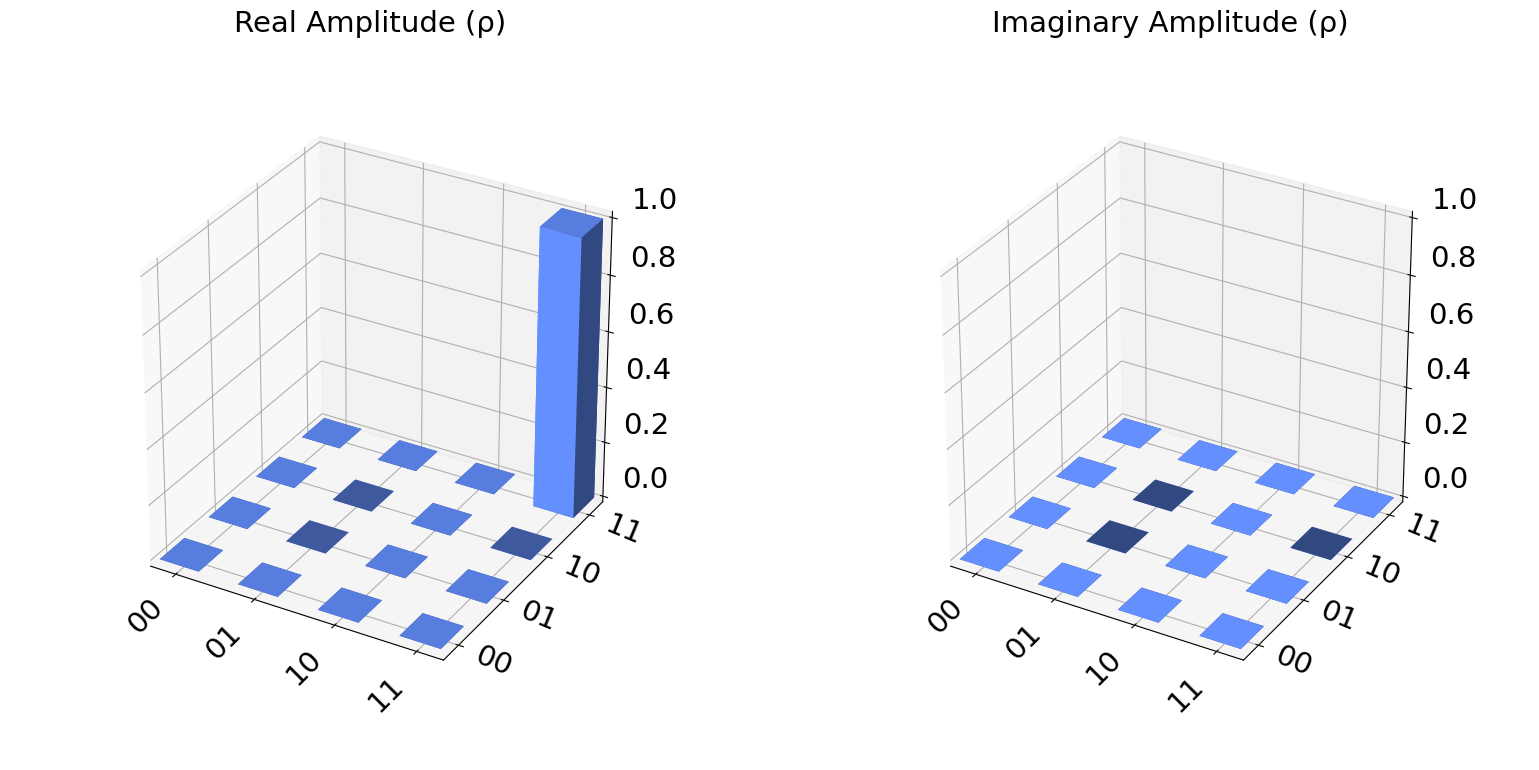

In [7]:
plot_state_city(stateVecIn)

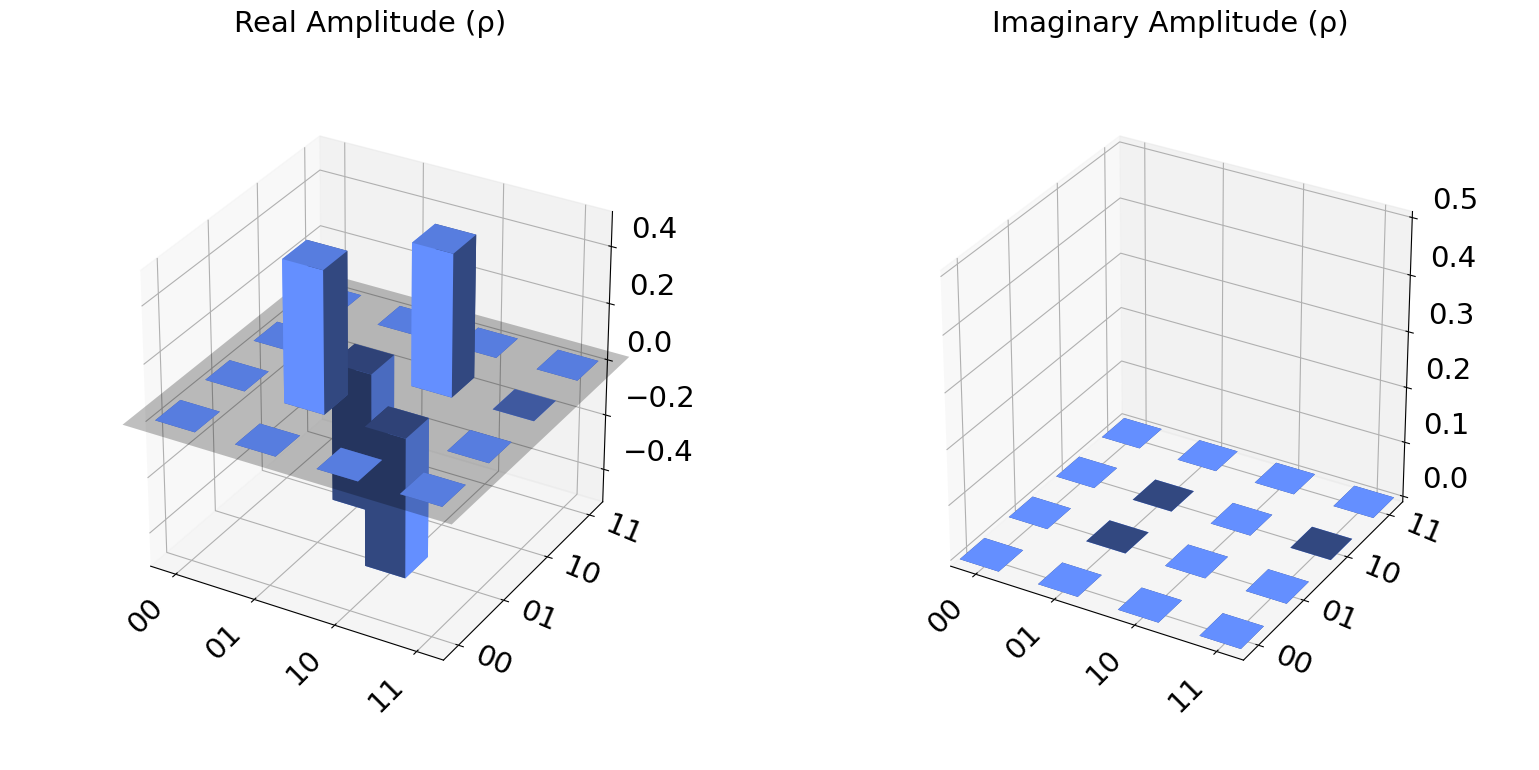

In [8]:
plot_state_city(stateVecOut)

### qsphere
Plot the qsphere representation of a quantum state. Here, the size of the points is proportional to the probability of the corresponding term in the state and the color represents the phase.

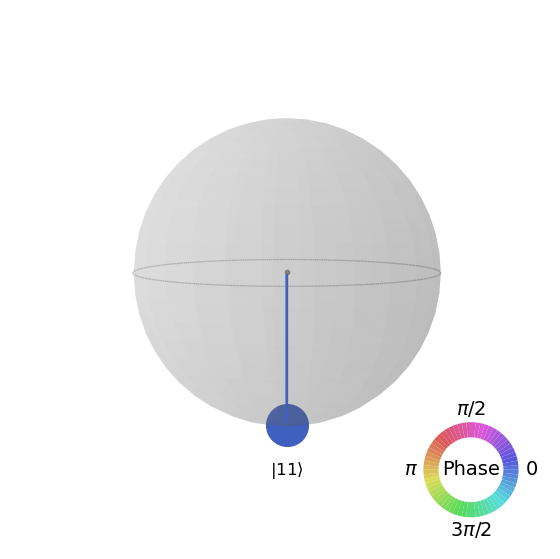

In [9]:
plot_state_qsphere(stateVecIn)

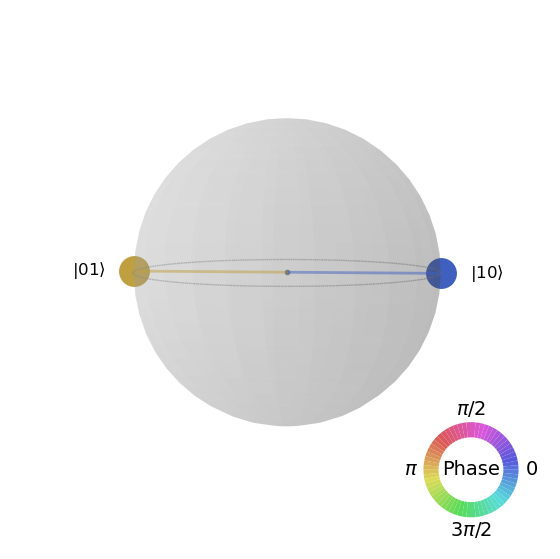

In [10]:
plot_state_qsphere(stateVecOut)

### Bloch sphere representation
In order to represent a statevector referred to a multi-qubit circuit we can use plot_bloch_multivector.

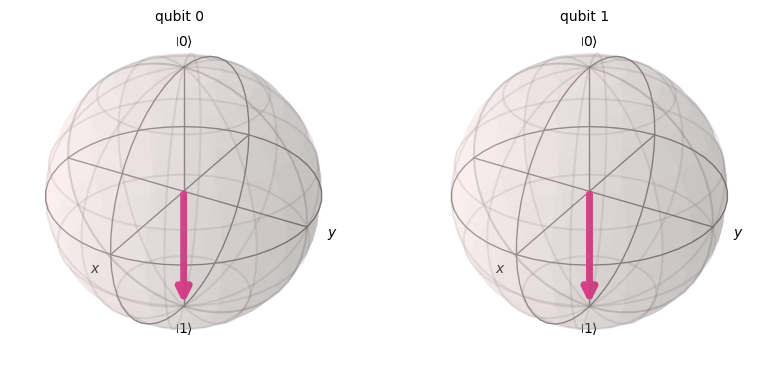

In [11]:
plot_bloch_multivector(stateVecIn)

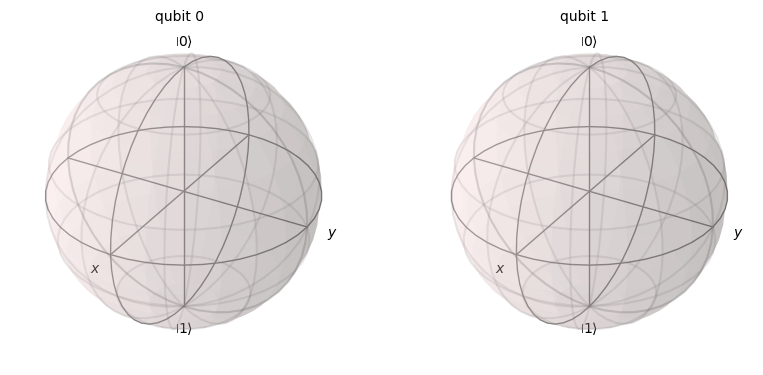

In [12]:
plot_bloch_multivector(stateVecOut)

**Remark** An entangled state can be viewed as a point over the origin of the Bloch sphere, this explains why the last plot shows two empty spheres.

### Measurements


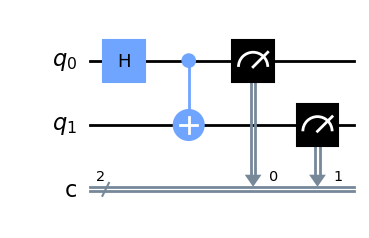

In [13]:
circ.measure([0, 1], [0, 1])
circ.draw('mpl', style='clifford')

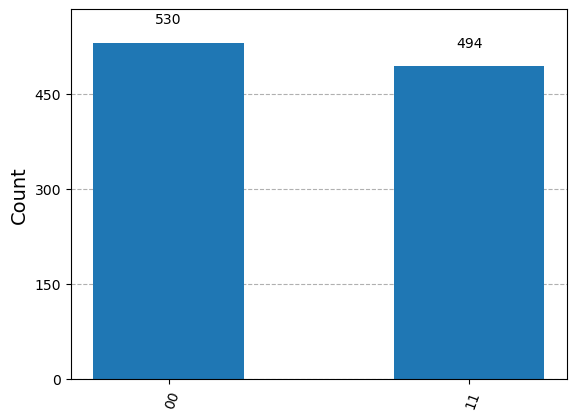

In [14]:
# Simulate the quantum circuit
backend =Aer.get_backend('statevector_simulator') # the device to run on
result_backend = backend.run(circ, shots=1024).result()
counts = result_backend.get_counts(circ)
plot_histogram(counts)